# CLASSIFICATION & LINEAR REGRESSION

### In this Notebook we will discus about:
* Basic EDA (Exploratory Data Analysis).
* Dimensionality reduction (PCA).
* K-Cross validation to check accuracy.
* ML's Classification Models like:
       * Logistic Regression
       * Support Vector Machine (SVM) with Linear kernel
       * Support Vector Machine (SVM) with Gaussian kernel
       * K-Nearest Neighbour (KNN)
       * Naive Bayes
       * Decision Tree
       * Random Forest
* Prediction on new Values.
* Linear Regression
* Using matplotlib libraries to show prediction values.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
    df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

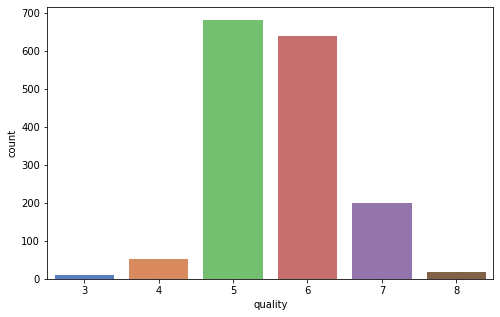

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(df['quality'], palette='muted')
df['quality'].value_counts()

### Transforming data

In [6]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [7]:
[(i, category.count(i)) for i in set(category)]

[('Low', 63), ('Medium', 1319), ('High', 217)]

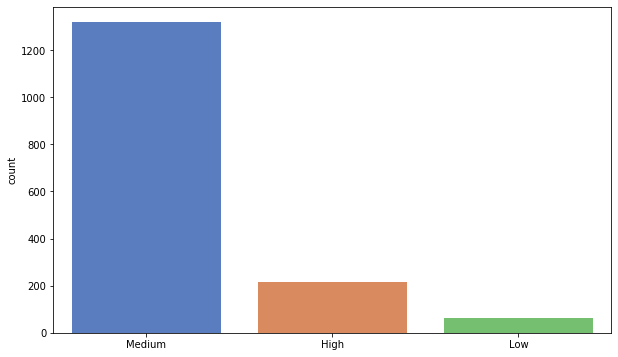

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

In [9]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [10]:
df.shape

(1599, 12)

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* AS there is no Null Values in the dataset, good.
* There is no Categorical values in the dataset.
* If there will be any Null Values, we need to do changes.
* Dataset is in proper format let us directly go to Classification portion.


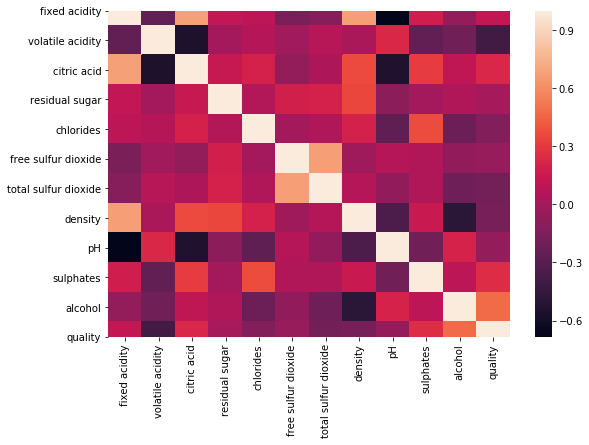

In [13]:
# Let us see the correlation between the different variables
# We will reduce the number of features from Principle Componemt Analysis (PCA)
plt.figure(figsize=(9,6))
sns.heatmap(data=df.corr())
plt.show()

### ========================================================================

# CLASSIFICATION:


#### Here we will use 7 Algoritms/Models of Classification of machine learning.
* They are as follow:-
* Logistic Regresion
* Support Vector Machine (SVM) with Linear kernel
* Support Vector Machine (SVM) with Gaussian kernel
* K-Nearest Neibhour (K-NN)
* Naive Bayes
* Decision Tree
* Random Forest Model
* We will use all the models one by one and then we will check the accuracy in each model and compare them, then we will choose the best model for our dataset.

In [14]:
# Let us Import the Important Libraries  to train our Model for Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler      # For Scaling the dataset
from sklearn.model_selection import cross_val_score   # To check the accuracy of the model.

* Here we do not have missing values, there is no categorical feature, and also we do not need to Split the dataset.
* Here we will apply Scaling on our dataset.

In [15]:
# Converting the DataFrame into Feature matrix and Target Vector.
x_train = df.iloc[:,:-1].values
y_train = df.iloc[:,-1].values

### Using Classification Models
#### 1). Scaling the dataset.


In [16]:
# Let us use scaling on our dataset.

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)


#### 2). Dimensionalty Reduction with Principle Component Analysis (PCA).

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None, )
x_train = pca.fit_transform(x_train)
explain_variance = pca.explained_variance_ratio_
explain_variance

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

* We will take n_component = 5, as sum of initial 5 variance is 0.80, which is very good.

In [18]:
# Let us apply PCA.

pca = PCA(n_components=5)
x_train = pca.fit_transform(x_train)


#### Observation:- 
* I have check models without applying PCA and with applying PCA.
* I am getting best result while not applying PCA.
* So, we will not reduce the dimension of our matrix, as it is effecting our results by 5% which is very high.

#### 3). Apply All Classification Models and compare their accuracies.

In [19]:
def all_models():
    # Apply One model at a time , not all in a single function. If we run all in a single function then it will take too much memory(RAM) and time.

    # Apply Logistic regression
    # First step is to train our model .

    classifier_logi = LogisticRegression()
    classifier_logi.fit(x_train,y_train)

    # Let us check the accuracy of the model
    accuracy = cross_val_score(estimator=classifier_logi, X=x_train, y=y_train, cv=10)
    print(f"The accuracy of the Logistic Regressor Model is \t {accuracy.mean()}")
    print(f"The deviation in the accuracy is \t {accuracy.std()}")
    print()



    # Apply SVM with Gaussian kernel
    classifier_svm2 = SVC(kernel='rbf', )
    classifier_svm2.fit(x_train,y_train)
    accuracy = cross_val_score(estimator=classifier_svm2, X=x_train, y=y_train, cv=10)
    print(f"The accuracy of the SVM Gaussian kernel Model is \t {accuracy.mean()}")
    print(f"The deviation in the accuracy is \t {accuracy.std()}")
    print()



    # Apply K_NN Model
    # Train model
    classifier_knn = KNeighborsClassifier()
    classifier_knn.fit(x_train,y_train)
    # Check the accuracy.
    accuracy = cross_val_score(estimator=classifier_knn, X=x_train, y=y_train, cv=10)
    print(f"The accuracy of the KNN Model is \t {accuracy.mean()}") 
    print(f"The deviation in the accuracy is \t {accuracy.std()}")
    print()

    # Apply Naive Bayes Model.
    # Train Model
    classifier_bayes = GaussianNB()
    classifier_bayes.fit(x_train,y_train)
    # Check the accuracy and deviation in the accuracy
    accuracy = cross_val_score(estimator=classifier_bayes, X=x_train, y=y_train, cv=10)
    print(f"The accuracy of the Naive Bayes Model is \t {accuracy.mean()}") 
    print(f"The deviation in the accuracy is \t {accuracy.std()}")
    print()

    # Apply Random Forest Model.
    # Train Model
    classifier_ran = RandomForestClassifier(n_estimators=10, criterion='entropy')
    classifier_ran.fit(x_train,y_train)
    # Check the accuracy and deviation in the accuracy
    accuracy = cross_val_score(estimator=classifier_ran, X=x_train, y=y_train, cv=10)
    print(f"The accuracy of the Random Forest Model is \t {accuracy.mean()}") 
    print(f"The deviation in the accuracy is \t {accuracy.std()}")
    print()
    return classifier_ran

In [20]:
# Let us run the all_models funtion and see the accuracies of all model
classifier = all_models()

The accuracy of the Logistic Regressor Model is 	 0.563107786575656
The deviation in the accuracy is 	 0.05906530209179536

The accuracy of the SVM Gaussian kernel Model is 	 0.5692569969139496
The deviation in the accuracy is 	 0.05934511435388614

The accuracy of the KNN Model is 	 0.5055298418194323
The deviation in the accuracy is 	 0.036610850311514606

The accuracy of the Naive Bayes Model is 	 0.5498639645164767
The deviation in the accuracy is 	 0.051063182089427964

The accuracy of the Random Forest Model is 	 0.5271740133579974
The deviation in the accuracy is 	 0.048340813436390836



#### Observation:- 
* The best accuracy, we are getting is from SVM Gaussian kernel Model, which is 59% with deviation of 6%.
* In future if we predict on new values then we will get the accuracy in range of 53% to 65%.
* Now one can take all inputs from User and make it a numpy array and can predict from our model.

In [21]:
# Our Target vector
y_train[:50]


array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5], dtype=int64)

In [22]:
# Making prediction on our Feature matrix and compare it with our Target vector.
classifier.predict(x_train)[:50]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5], dtype=int64)

* Maximum times we are getting the same result.

### =========================================================================
### =========================================================================
### =========================================================================
### =========================================================================

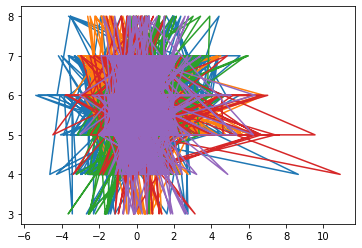

In [23]:
plt.plot(x_train,y_train)
plt.show()


Text(0.5, 1.0, 'Wine quality')

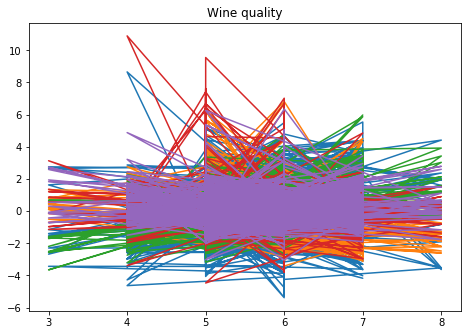

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(y_train,x_train)
ax.set_title("Wine quality")


Text(0.5, 1.0, 'Wine quality')

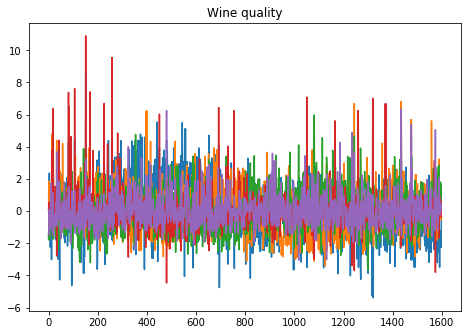

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x_train)
ax.set_title("Wine quality")

Text(0.5, 1.0, 'Wine quality')

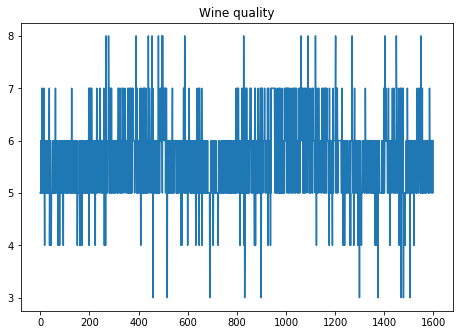

In [26]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(y_train)
ax.set_title("Wine quality")

### All the information about x_train and y_train on tables using matplotlib libraries

#### Using Linear Regression

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,random_state=3)

In [28]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test) 
print(test_pred)

[5.34067361 5.23951969 6.12811899 ... 6.31912891 6.27400556 5.19512382]
[5.22327162 5.63059903 5.69182984 6.2045786  5.10664147 5.30358796
 4.85950558 6.11062159 5.49828792 5.87971751 5.75133359 5.20209091
 5.14973448 5.48345065 6.3767532  5.00242548 6.07565384 5.29825219
 6.21890252 6.24068781 6.45525424 5.77246273 5.59537965 5.32972187
 5.33584023 5.3753202  5.37734547 6.52030992 5.91167396 5.60753009
 5.67957212 6.23383527 5.05133472 5.62927174 5.16716049 6.26640229
 6.70829724 5.19652246 5.48873716 5.62927174 5.20625133 4.95881429
 6.45590927 5.43528213 5.15622282 5.92655154 5.51102123 5.18876418
 5.17603933 5.46089206 5.04829036 5.68609702 5.93611822 6.38715001
 5.32883515 5.22217462 5.08413393 5.18716212 5.31120552 5.28437263
 5.19421978 5.64138619 5.46009012 5.53801903 5.61560783 6.66291417
 5.37454517 5.77201093 5.30345755 5.98588074 5.83689547 5.69635855
 5.65583213 5.01618546 6.19341702 5.60479904 5.15262195 5.77871521
 5.76782508 5.60753009 6.12416338 5.52496193 4.9082773  5

Text(0.5, 1.0, 'Wine quality')

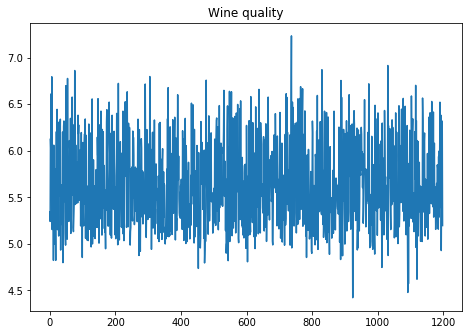

In [30]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(train_pred)
ax.set_title("Wine quality")

Text(0.5, 1.0, 'Wine quality')

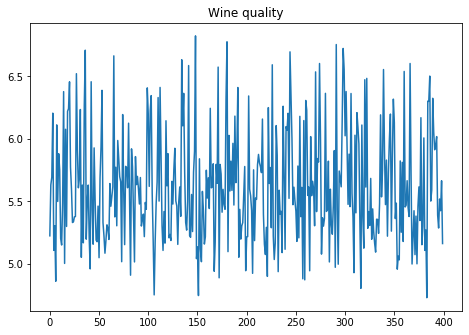

In [31]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_pred)
ax.set_title("Wine quality")

### All the information about pred_train and test_train on tables using matplotlib libraries